### Tools

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from utils.lab_utils_multi import load_house_data
from utils.lab_utils_common import dlc

### Gradient Descent

#### Load the dataset

In [8]:
x_train, y_train = load_house_data()
x_features = ["size(sqft)", "bedrooms", "floors", "age"]

#### Scale/normalize the training data

In [9]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]


#### Create and fit the regression model

In [10]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 126, number of weight updates: 12475.0


#### View parameters

In [11]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.13808749 -21.06448897 -32.47405689 -38.03891619], b:[363.13627591]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


#### Make predictions

In [12]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(x_norm)
# make a prediction using w,b
y_pred = np.dot(x_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.17084446 485.85611742 389.56340524 492.0183019 ]
Target values 
[300.  509.8 394.  540. ]


#### Plot Results

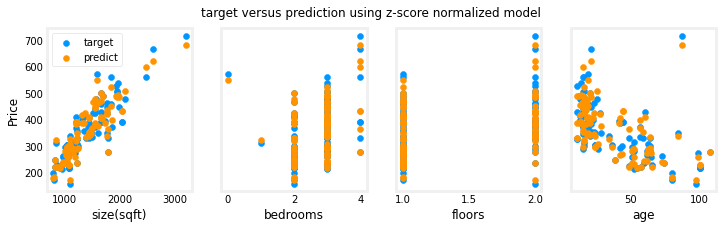

In [13]:
# plot predictions and targets vs original features
fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x_train[:,i], y_train, label="target")
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i], y_pred, color=dlc["dlorange"], label="predict")

ax[0].set_ylabel("Price"); ax[0].legend(); 
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()
